In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import os

from numba import jit
import numpy
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

data_abb = pd.read_csv('ABB_ML_ready.csv')
data_abb.head()

,Unnamed: 0,price,minimum_nights,availability_365,number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,225,10,1,48,0,0,1,0,0,1,0,0,0
1,1,89,1,1,295,0,1,0,0,0,1,0,0,0
2,2,200,3,19,78,0,0,1,0,0,1,0,0,0
3,3,60,29,365,49,0,1,0,0,0,0,0,1,0
4,4,79,2,242,454,0,0,1,0,0,0,0,1,0


In [2]:
 test_score = []
def get_r_squared(max_neighbors=7, samples=100):
    train_score = []
   
    models = []
    inputs, values = make_regression(n_samples=samples)
    X_train, X_test, y_train, y_test = train_test_split(inputs, values)

    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models


([1.0,
  0.6207709640339172,
  0.49519960043293365,
  0.4321072538987587,
  0.45100329130950223,
  0.3922966429694882,
  0.37571888943754905,
  0.33242949028022095,
  0.317236301322099,
  0.288397649128022,
  0.2927111379768541,
  0.2721761362647034,
  0.24807345112723542,
  0.2317852685473499,
  0.2219810647145931,
  0.2069062503035286,
  0.20125809219965152,
  0.1884236470333345,
  0.17696644933753833,
  0.17150726236127334],
 [-0.9354692431167578,
  -0.2930690350726495,
  0.09416492051297722,
  0.11293426690553175,
  0.13821369186651333,
  0.12252572945733409,
  0.19260775810587738,
  0.18537959359614375,
  0.15063207160437675,
  0.13945265387036632,
  0.16546408380121447,
  0.20866124178991685,
  0.18719353213806197,
  0.18472789649015908,
  0.22039259178883844,
  0.21482497317059168,
  0.1877770038535388,
  0.2143122173607774,
  0.2168767315344574,
  0.22637286939968404],
 [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=

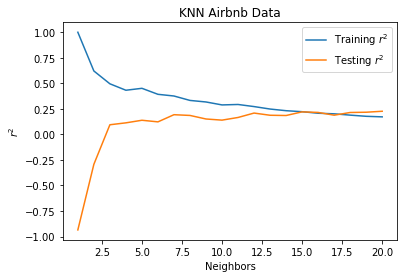

In [3]:
def plot_r_squared(neighbors=20, samples=100):
    train_score, test_score, models = get_r_squared(neighbors, samples)
    neighbors = range(1, neighbors+1)
    pyplot.plot(neighbors, train_score, label="Training $r^2$")
    pyplot.plot(neighbors, test_score, label="Testing $r^2$")
    pyplot.xlabel("Neighbors")
    pyplot.ylabel("$r^2$")
    pyplot.title("KNN Airbnb Data")
    pyplot.legend()
    return train_score, test_score, models
plot_r_squared()

In [4]:
print("Max r2: {:.2f}".format(max(test_score)))

Max r2: 0.23
